# Day 09. Exercise 00
# Regularization

## 0. Imports

In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix

## 1. Preprocessing

1. Read the file `dayofweek.csv` that you used in the previous day to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`. Use the additional parameter `stratify`.

In [2]:
!gdown --id 1YEZ-9uBgx-UmR_6xJkP-SSwL-N-IS4sn

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1YEZ-9uBgx-UmR_6xJkP-SSwL-N-IS4sn
To: /content/dayofweek.csv
100% 209k/209k [00:00<00:00, 70.9MB/s]


In [3]:
df = pd.read_csv('dayofweek.csv')
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.756764,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.724861,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.692958,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.661055,-2.562352,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1682,-0.629151,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1683,-0.597248,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1684,-0.565345,0.945382,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
X = df.drop('dayofweek', axis=1)
y = df['dayofweek']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

## 2. Logreg regularization

### a. Default regularization

1. Train a baseline model with the only parameters `random_state=21`, `fit_intercept=False`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model


The result of the code where you trained and evaluated the baseline model should be exactly like this (use `%%time` to get the info about how long it took to run the cell):

```
train -  0.62902   |   valid -  0.59259
train -  0.64633   |   valid -  0.62963
train -  0.63479   |   valid -  0.56296
train -  0.65622   |   valid -  0.61481
train -  0.63397   |   valid -  0.57778
train -  0.64056   |   valid -  0.59259
train -  0.64138   |   valid -  0.65926
train -  0.65952   |   valid -  0.56296
train -  0.64333   |   valid -  0.59701
train -  0.63674   |   valid -  0.62687
Average accuracy on crossval is 0.60165
Std is 0.02943
```

In [6]:
lr = LogisticRegression(fit_intercept=False, random_state=21)

In [7]:
def crossval(estimator, X, y, n_splits=10):
    train_scores = []
    valid_scores = []
    cv = StratifiedKFold(n_splits=n_splits)
    for train, valid in cv.split(X, y):
        estimator.fit(X.iloc[train], y.iloc[train])
        y_train_pred = estimator.predict(X.iloc[train])
        y_valid_pred = estimator.predict(X.iloc[valid])
        train_scores.append(accuracy_score(y.iloc[train], y_train_pred))
        valid_scores.append(accuracy_score(y.iloc[valid], y_valid_pred))
    for train, valid in zip(train_scores, valid_scores):
        print(f'train -  {train:.5f}   {"|"}   valid -  {valid:.5f}')
    print(f'Average accuracy on crossval is {np.mean(valid_scores):.5f}')
    print(f'Std is {np.std(valid_scores):.5f}')

In [8]:
%%time
crossval(lr, X_train, y_train)

train -  0.62902   |   valid -  0.59259
train -  0.64633   |   valid -  0.62963
train -  0.63479   |   valid -  0.56296
train -  0.65622   |   valid -  0.61481
train -  0.63397   |   valid -  0.57778
train -  0.64056   |   valid -  0.59259
train -  0.64138   |   valid -  0.65926
train -  0.65952   |   valid -  0.56296
train -  0.64333   |   valid -  0.59701
train -  0.63674   |   valid -  0.62687
Average accuracy on crossval is 0.60165
Std is 0.02943
CPU times: user 1.63 s, sys: 1.29 s, total: 2.92 s
Wall time: 1.76 s


### b. Optimizing regularization parameters

1. In the cells below try different values of penalty: `none`, `l1`, `l2` – you can change the values of solver too.

In [9]:
param_grid = [{'solver': ['newton-cg', 'lbfgs', 'sag'],
               'penalty': ['l2', 'none']},
              {'solver': ['saga'], 'penalty': ['l1', 'l2', 'none']},
              {'solver': ['liblinear'], 'penalty': ['l1', 'l2']}]

gs = GridSearchCV(lr, param_grid, scoring='accuracy', n_jobs=-1)

In [10]:
gs.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


GridSearchCV(estimator=LogisticRegression(fit_intercept=False, random_state=21),
             n_jobs=-1,
             param_grid=[{'penalty': ['l2', 'none'],
                          'solver': ['newton-cg', 'lbfgs', 'sag']},
                         {'penalty': ['l1', 'l2', 'none'], 'solver': ['saga']},
                         {'penalty': ['l1', 'l2'], 'solver': ['liblinear']}],
             scoring='accuracy')

In [11]:
gs.best_params_

{'penalty': 'none', 'solver': 'sag'}

In [12]:
gs.best_score_

0.6313314057551975

In [13]:
lr = LogisticRegression(penalty='none', fit_intercept=False, random_state=21, solver='sag')

In [14]:
param_grid = {'C': np.logspace(-4, 4, 20)}
gs = GridSearchCV(lr, param_grid, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


GridSearchCV(estimator=LogisticRegression(fit_intercept=False, penalty='none',
                                          random_state=21, solver='sag'),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])},
             scoring='accuracy')

In [15]:
gs.best_params_

{'C': 0.0001}

In [16]:
gs.best_score_

0.6313314057551975

## 3. SVM regularization

### a. Default regularization

1. Train a baseline model with the only parameters `probability=True`, `kernel='linear'`, `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [17]:
svc = SVC(kernel='linear', probability=True, random_state=21)

In [18]:
%%time
crossval(svc, X_train, y_train)

train -  0.70486   |   valid -  0.65926
train -  0.69662   |   valid -  0.75556
train -  0.69415   |   valid -  0.62222
train -  0.70239   |   valid -  0.65185
train -  0.69085   |   valid -  0.65185
train -  0.68920   |   valid -  0.64444
train -  0.69250   |   valid -  0.72593
train -  0.70074   |   valid -  0.62222
train -  0.69605   |   valid -  0.61940
train -  0.71087   |   valid -  0.63433
Average accuracy on crossval is 0.65871
Std is 0.04359
CPU times: user 4.83 s, sys: 6.87 ms, total: 4.84 s
Wall time: 4.82 s


### b. Optimizing regularization parameters

1. In the cells below try different values of the parameter `C`.

In [19]:
param_grid = {'C': [1, 10, 100]}
gs = GridSearchCV(svc, param_grid, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=SVC(kernel='linear', probability=True, random_state=21),
             n_jobs=-1, param_grid={'C': [1, 10, 100]}, scoring='accuracy')

In [20]:
gs.best_params_

{'C': 100}

In [21]:
gs.best_score_

0.7403662398457937

## 4. Tree

### a. Default regularization

1. Train a baseline model with the only parameter `max_depth=10` and `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [22]:
dtc = DecisionTreeClassifier(max_depth=10, random_state=21)

In [23]:
%%time
crossval(dtc, X_train, y_train)

train -  0.81039   |   valid -  0.74074
train -  0.77741   |   valid -  0.74074
train -  0.83347   |   valid -  0.70370
train -  0.79720   |   valid -  0.76296
train -  0.82440   |   valid -  0.75556
train -  0.80379   |   valid -  0.68889
train -  0.80709   |   valid -  0.76296
train -  0.80132   |   valid -  0.65926
train -  0.80807   |   valid -  0.75373
train -  0.80478   |   valid -  0.68657
Average accuracy on crossval is 0.72551
Std is 0.03562
CPU times: user 110 ms, sys: 2.89 ms, total: 112 ms
Wall time: 114 ms


### b. Optimizing regularization parameters

1. In the cells below try different values of the parameter `max_depth`.
2. As a bonus, play with other regularization parameters trying to find the best combination.

In [24]:
param_grid = {'criterion': ['gini','entropy'],
              'max_depth': np.arange(3, 21),
              'min_samples_split': [2, 3, 4]}
gs = GridSearchCV(dtc, param_grid, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=10, random_state=21),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20]),
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy')

In [25]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2}

In [26]:
gs.best_score_

0.8679223461379595

## 5. Random forest

### a. Default regularization

1. Train a baseline model with the only parameters `n_estimators=50`, `max_depth=14`, `random_state=21`.
2. Use stratified K-fold cross-validation with `10` splits to evaluate the accuracy of the model.
3. The format of the result of the code where you trained and evaluated the baseline model should be similar to what you have got for the logreg.

In [27]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=14, random_state=21)

In [28]:
%%time
crossval(rfc, X_train, y_train)

train -  0.96455   |   valid -  0.88148
train -  0.96208   |   valid -  0.91852
train -  0.96785   |   valid -  0.86667
train -  0.96455   |   valid -  0.89630
train -  0.96538   |   valid -  0.91111
train -  0.96538   |   valid -  0.88148
train -  0.97115   |   valid -  0.91852
train -  0.96867   |   valid -  0.85185
train -  0.97364   |   valid -  0.88060
train -  0.97941   |   valid -  0.86567
Average accuracy on crossval is 0.88722
Std is 0.02204
CPU times: user 1.34 s, sys: 10.6 ms, total: 1.35 s
Wall time: 1.35 s


### b. Optimizing regularization parameters

1. In the new cells try different values of the parameters `max_depth` and `n_estimators`.
2. As a bonus, play with other regularization parameters trying to find the best combination.

In [29]:
param_grid = {'criterion': ['gini','entropy'],
              'max_depth': np.arange(3, 21),
              'min_samples_split': [2, 3, 4]}
gs = GridSearchCV(rfc, param_grid, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(max_depth=14, n_estimators=50,
                                              random_state=21),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20]),
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy')

In [30]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2}

In [31]:
gs.best_score_

0.8946413327825967

## 6. Predictions

1. Choose the best model and use it to make predictions for the test dataset.
2. Calculate the final accuracy.
3. Analyze: for which weekday your model makes the most errors (in % of the total number of samples of that class in your test dataset).
4. Save the model.

In [32]:
y_pred = gs.best_estimator_.predict(X_test)

In [33]:
accuracy_score(y_test, y_pred)

0.9260355029585798

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


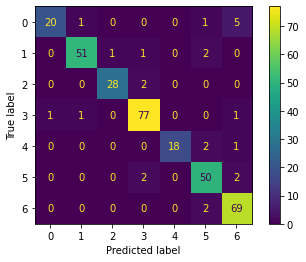

In [34]:
plot_confusion_matrix(gs.best_estimator_, X_test, y_test)
plt.show()

In [35]:
joblib.dump(gs.best_estimator_, 'model.joblib')

['model.joblib']